In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, confusion_matrix, adjusted_rand_score

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


c:\Users\Bluepal\anaconda3\envs\python_course\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [4]:
inertia = kmeans.inertia_
sil_score = silhouette_score(X_scaled, y_kmeans)
ari_score = adjusted_rand_score(y_true, y_kmeans)

print(f"\nInertia (sum of squared distances): {inertia:.2f}")
print(f"Silhouette Score: {sil_score:.2f}")
print(f"Adjusted Rand Index (vs true labels): {ari_score:.2f}")

cm = confusion_matrix(y_true, y_kmeans)
print("\nConfusion Matrix:\n", cm)


Inertia (sum of squared distances): 139.82
Silhouette Score: 0.46
Adjusted Rand Index (vs true labels): 0.62

Confusion Matrix:
 [[ 0 50  0]
 [39  0 11]
 [14  0 36]]


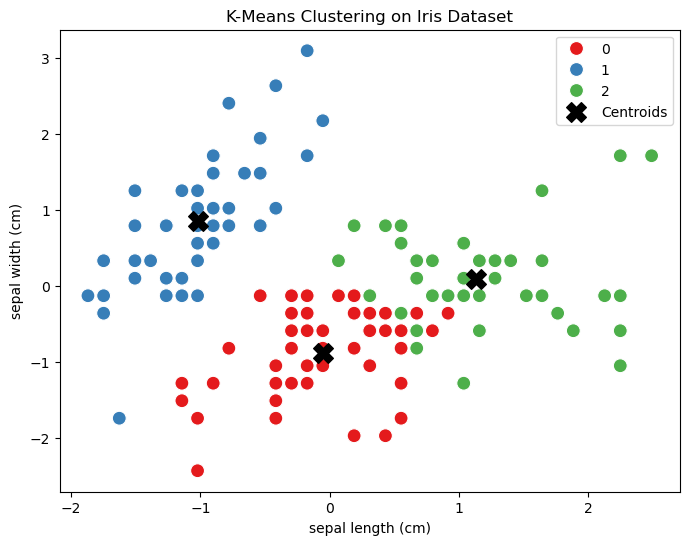

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette='Set1', s=100)
plt.scatter(centroids[:,0], centroids[:,1], color='black', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.show()